In [2]:
import numpy as np
from skfem import *
from skfem.supermeshing import intersect, elementwise_quadrature
from skfem.models.elasticity import (linear_elasticity, lame_parameters,
                                     linear_stress)
from skfem.helpers import dot, sym_grad, jump, mul
from skfem.io.json import from_file
from pathlib import Path
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
from skfem.visuals.matplotlib import plot, draw



<skfem MeshTri1 object>
  Number of elements: 6240
  Number of vertices: 3225
  Number of nodes: 3225
  Named subdomains [# elements]: domain [6240]
  Named boundaries [# facets]: contact [128], dirichlet [80]


TypeError: 'WindowsPath' object is not subscriptable

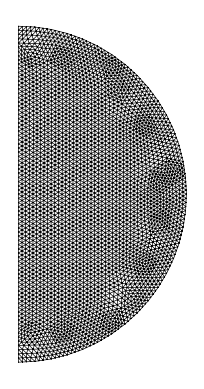

In [42]:


mesh_file = Path('ex04_mesh.json')
mesh_file2 = Path('test_mesh.json')
mesh_file

m1 = from_file(mesh_file).refined(2)
m2 = from_file(mesh_file2).refined(0)

print(m1)
draw(m1)
plt.scatter(mesh_file2['p'])

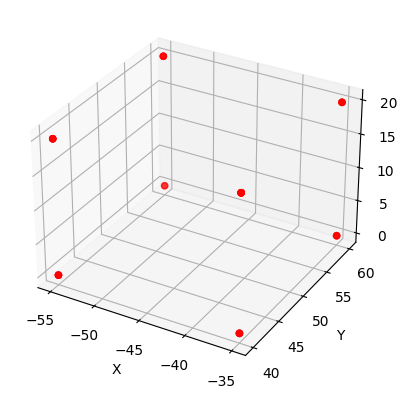

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_stl(file_path):
    points = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Iterate through the lines of the file
        for line in lines:
            # Split the line into its components
            components = line.split()

            # Check if the line represents a vertex (vertex lines start with "vertex")
            if len(components) >= 4 and components[0] == 'vertex':
                # Extract the x, y, and z coordinates of the vertex
                x = float(components[1])
                y = float(components[2])
                z = float(components[3])

                # Append the coordinates to the list of points
                points.append((x, y, z))

    return points

def plot_points_3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]

    # Plot points
    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Beispielaufruf der Funktionen
file_path = 'Output.stl'  # Passe den Pfad zur deiner STL-Datei an
triangle_points = read_stl(file_path)
plot_points_3d(triangle_points)


In [31]:

import json
def generate_subdomains(points):
    subdomains = {'domain': list(range(len(points)))}
    return subdomains



def generate_tetrahedra(points):
    tetrahedra = []
    num_points = len(points)

    # Annahme: Es gibt mindestens vier Punkte für einen Tetraeder
    for i in range(0, num_points - 3, 4):
        tetrahedron = [i, i+1, i+2, i+3]
        tetrahedra.append(tetrahedron)

    return tetrahedra

def write_json(file_path, points, tetrahedra, subdomains):
    data = {'p': points, 't': tetrahedra, 'subdomains': subdomains}

    with open(file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

# Beispielaufruf der Funktionen
file_path = 'mesh_data.json'  # Dateipfad für die JSON-Datei

tetra_points = read_stl('Output.stl')# Annahme: 'beispiel.stl' ist der Dateiname deiner STL-Datei

tetra_subdomains = generate_subdomains(tetra_points)
tetra_tetrahedra = generate_tetrahedra(tetra_points)
write_json(file_path, tetra_points, tetra_tetrahedra, tetra_subdomains)



In [3]:
mesh_file = Path('mesh_data.json')
m1 = from_file(mesh_file)

base = basis(m1, MeshTri2)
draw(m1)

NameError: name 'basis' is not defined